### Student Information
Name: 鄭幸怡

Student ID: 109062305

GitHub ID: 

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

# Lab 1 part 1 
Do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

In [3]:
# src: https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [60]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np
import pandas as pd

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df['missing_example'].isnull())
# Answer here
for i in range(len(NA_df)):
    print(type(NA_df['missing_example'][i]))
print("Though the contents are all NaN or None, some of them are string.")
print("string data containing \'NaN\' or \'None\' is not treated as null by isnull()")

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>
Though the contents are all NaN or None, some of them are string.
string data containing 'NaN' or 'None' is not treated as null by isnull()


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
sample_size = 1000
X_sample = X.sample(n=sample_size,random_state=42) #random state

In [10]:
# Answer here
print("The order of each index changed")
# print(X_sample.head())
# print(X.head())
print("The distribution of each category changed slightly")
for category in categories: 
    x = len(X.loc[X['category_name']==category])/len(X)
    x_sample = len(X_sample.loc[X_sample['category_name']==category])/len(X_sample)
    print(f"percentage of category_name=={category}", end='')
    print(f"in X: {x}, in X_sample: {x_sample}, difference = {x-x_sample}")
    # print(f"percentage of category_name=={category} in X_sample: {len(X_sample.loc[X_sample['category_name']==category])/len(X_sample)}")


The order of each index changed
The distribution of each category changed slightly
percentage of category_name==alt.atheismin X: 0.21267168808152415, in X_sample: 0.206, difference = 0.0066716880815241575
percentage of category_name==soc.religion.christianin X: 0.2653965440850687, in X_sample: 0.27, difference = -0.0046034559149313314
percentage of category_name==comp.graphicsin X: 0.25875055383252105, in X_sample: 0.247, difference = 0.011750553832521049
percentage of category_name==sci.medin X: 0.2631812140008861, in X_sample: 0.277, difference = -0.013818785999113903


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
Set the upper bound to max(X_sample.category_name.value_counts() 
and round it up to hundreds. Upper bound: 300
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

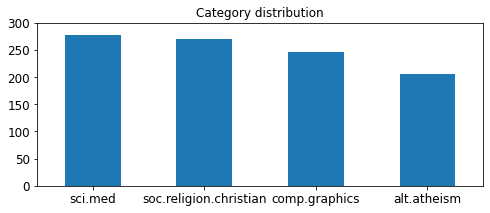

In [11]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = round((max(X_sample.category_name.value_counts()))/100)*100 #277 + 50
print("Set the upper bound to max(X_sample.category_name.value_counts() \nand round it up to hundreds. Upper bound:",upper_bound)
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

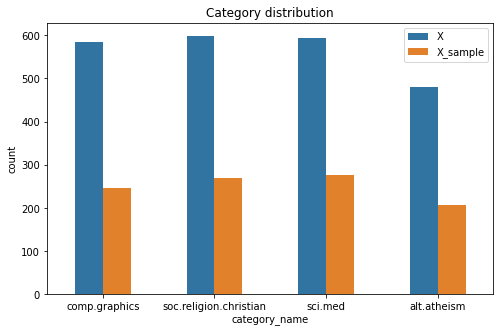

In [12]:
# Answer here
import seaborn as sns
X_sample['method'] = 'X_sample'
X['method'] = 'X'
X_concat = pd.concat([X, X_sample])
ax = sns.countplot(X_concat, x="category_name", hue="method", width=0.5)
ax.set_title('Category distribution')
ax.legend(title='')
ax.figure.set_size_inches(8, 5)

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [13]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
a = analyze(X.text[0])
print(len(a))

98


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix


In [15]:
# Answer here
import scipy
A = scipy.sparse.csr_matrix(X_counts[0:5, 0:100].toarray())
find = scipy.sparse.find(A)
print(find)
for r, c in zip(find[0], find[1]):
    print(f"Found document{r} has word {count_vect.get_feature_names_out()[c]} (wordId={c})")

(array([4, 4], dtype=int32), array([ 0, 37], dtype=int32), array([1, 1]))
Found document4 has word 00 (wordId=0)
Found document4 has word 01 (wordId=37)


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

['the', 'to', 'of', 'and', 'is', 'in', 'that', 'it', 'not', 'be']
[451, 317, 280, 218, 211, 200, 182, 146, 118, 117]


<AxesSubplot:title={'center':'Top 10 terms in the 50 documents before analyze()'}, xlabel='term', ylabel='frequency'>

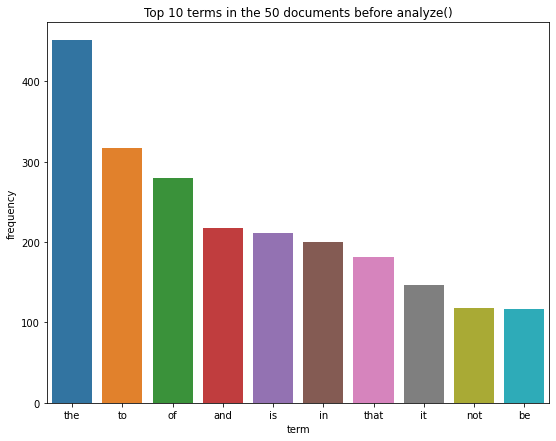

In [18]:
import matplotlib.pyplot as plt
# src: https://stackoverflow.com/questions/20612769/how-to-get-sum-of-each-row-and-sum-of-each-column-in-scipy-sparse-matrices-csr
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
doc_size = 50
b = scipy.sparse.csr_matrix(X_counts[0:doc_size, :].toarray())
B = (b.sum(axis=0)).A[0]
# print(B) # B: the frequency of each word
# type(B)
ind = B.argsort()[-10:][::-1]
plot_x = [str(i) for i in count_vect.get_feature_names_out()[ind]]
print(plot_x)
plot_y = [i for i in list(B[ind])]
print(plot_y)
df_toplot = pd.DataFrame(
    {'term': plot_x,
     'frequency':plot_y}
)
plt.subplots(figsize=(9, 7))
plt.title(f'Top 10 terms in the {doc_size} documents before analyze()')
sns.barplot(df_toplot, x='term', y='frequency')

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Answer here
# https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
X_reduced_to_3d = PCA(n_components = 3).fit_transform(X_counts.toarray()) # reduce into 3 dim

In [25]:
col = ['coral', 'blue', 'black', 'orange']

def example_plot(ax, elev, azim):
    ax.view_init(elev=elev, azim=azim)
    for c, category in zip(col, categories):
        xs = X_reduced_to_3d[X['category_name'] == category].T[0]
        ys = X_reduced_to_3d[X['category_name'] == category].T[1]
        zs = X_reduced_to_3d[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, marker='o', color=c, label=category)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

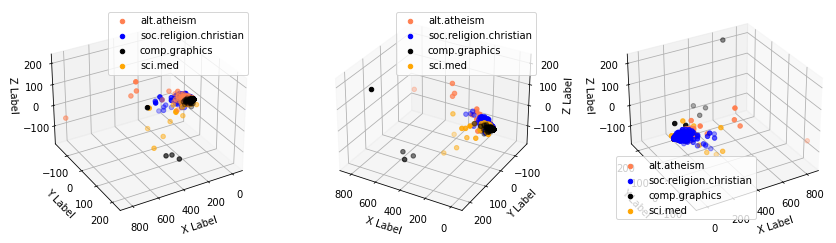

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(12, 4))

subfigs = fig.subfigures(1, 3)
azim_list = [60, 120, 240]
for f, azim in zip(subfigs, azim_list):
    ax = f.add_subplot(projection='3d')
    example_plot(ax, elev=30, azim=azim)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [33]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

Text(0, 0.5, 'frequency')

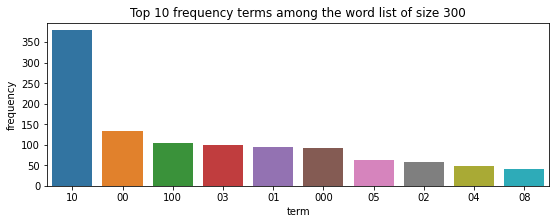

In [34]:
# Answer here
plt.subplots(figsize=(9, 3))
_y = term_frequencies[:300]
ind = _y.argsort()[-10:][::-1]
# print(_y[ind])
ax = sns.barplot(x=count_vect.get_feature_names_out()[ind], 
            y=_y[ind])
ax.set_title('Top 10 frequency terms among the word list of size 300')
ax.set_xlabel('term')
ax.set_ylabel('frequency')

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


Text(0, 0.5, 'frequency')

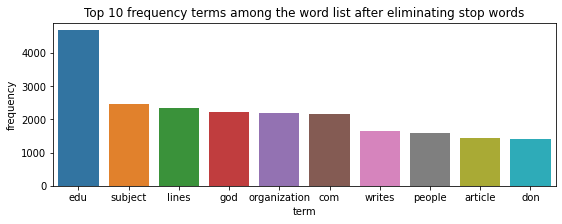

In [37]:
# Answer here
vectorizer_stop = CountVectorizer(stop_words='english')
# count_vect = CountVectorizer()
X_counts_stop = vectorizer_stop.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts_stop.shape)
# print(X_counts_stop[0])
# Answer here
term_frequencies_stop = np.asarray(X_counts_stop.sum(axis=0))[0]
plt.subplots(figsize=(9, 3))
_y = term_frequencies_stop[:]
ind = _y.argsort()[-10:][::-1]
# print(_y[ind])
ax = sns.barplot(x=vectorizer_stop.get_feature_names_out()[ind], 
            y=_y[ind])
ax.set_title('Top 10 frequency terms among the word list after eliminating stop words')
ax.set_xlabel('term')
ax.set_ylabel('frequency')

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

Text(0, 0.5, 'frequency')

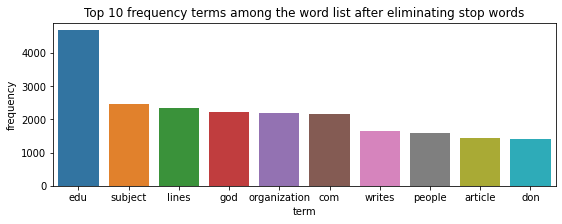

In [38]:
# Answer here
vectorizer_stop = CountVectorizer(stop_words='english')
# count_vect = CountVectorizer()
X_counts_stop = vectorizer_stop.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts_stop.shape)
# print(X_counts_stop[0])
# Answer here
term_frequencies_stop = np.asarray(X_counts_stop.sum(axis=0))[0]
plt.subplots(figsize=(9, 3))
_y = term_frequencies_stop[:]
ind = _y.argsort()[-10:][::-1]
# print(_y[ind])
ax = sns.barplot(x=vectorizer_stop.get_feature_names_out()[ind], 
            y=_y[ind])
ax.set_title('Top 10 frequency terms among the word list after eliminating stop words')
ax.set_xlabel('term')
ax.set_ylabel('frequency')

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [41]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [44]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

mlb_category_name = preprocessing.LabelBinarizer()
mlb_category_name.fit(X.category_name)
X['bin_category_name'] = mlb_category_name.transform(X['category_name']).tolist()
print("Yes, it works the same with binarization using category")
X[0:9]

Yes, it works the same with binarization using category


,text,category,category_name,method,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,X,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,X,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,X,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,X,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,X,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,X,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,X,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,X,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,X,"[0, 0, 1, 0]","[0, 0, 1, 0]"


# Lab 1 part 2
Follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [75]:
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        temp_l = temp_d.split("\t")
        D.append([temp_d, temp_l])
    return D

In [53]:
import pathlib
datasetDir = './sentiment labelled sentences/'
fileNames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']

In [67]:
text = []
for fn in fileNames: 
    path = pathlib.Path(datasetDir + fn)
    # print(path)
    f = open(path, 'r')
    # text = []
    for line in f:
        text.append(line)
# print(text)

In [76]:
format_rows(text)

[['So there is no way for me to plug it in here in the US unless I go by a converter.\t0 ',
  'So there is no way for me to plug it in here in the US unless I go by a converter. 0 '],
 ['Good case, Excellent value.\t1 ', 'Good case, Excellent value. 1 '],
 ['Great for the jawbone.\t1 ', 'Great for the jawbone. 1 '],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0 ',
  'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! 0 '],
 ['The mic is great.\t1 ', 'The mic is great. 1 '],
 ['I have to jiggle the plug to get it to line up right to get decent volume.\t0 ',
  'I have to jiggle the plug to get it to line up right to get decent volume. 0 '],
 ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0 ',
  'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. 0 '],
 ['If you are Razr owner...you must have t

In [62]:
X = pd.DataFrame.from_records(text, columns= ['text'])

ValueError: 1 columns passed, passed data had 482 columns

In [61]:
D = dmh.format_rows(text)

AttributeError: 'list' object has no attribute 'data'

# Lab 1 part 3
Please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
* Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
* Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
* Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

# Lab 1 part 4
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

# Lab 1 part 5
It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__

You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 